In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# 1. Warm up - identity matrix
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [58]:
# 2. Linear regression with one variable

In [59]:
# 2.1 Plotting the Data

In [60]:
x,y = np.loadtxt('./ex1data1.txt', delimiter=',', unpack=True)

In [61]:
print('x length: {}'.format(len(x)))
print('y length: {}'.format(len(y)))

x length: 97
y length: 97


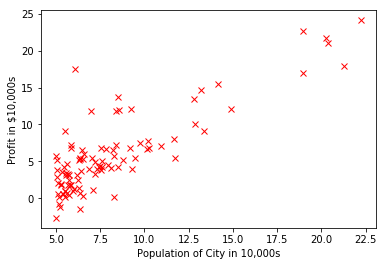

In [62]:
plt.plot(x, y, 'rx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [63]:
# 2.2 Gradient Descent

In [64]:
x.shape

(97,)

In [65]:
X_1 = x.reshape(-1,1)
X_1.shape

(97, 1)

In [66]:
X_0 = np.ones(len(x)).reshape(-1,1)
X_0.shape

(97, 1)

In [67]:
X = np.concatenate((X_0, X_1), axis=1)
X.shape

(97, 2)

In [68]:
iterations = 1500
alpha = 0.01

In [69]:
theta = np.zeros(2).reshape(2, 1)
theta.shape

(2, 1)

In [70]:
def compute_cost(X, y, theta):
    m = len(X)
    sum_diff = sum((theta[0] * X[i][0] + theta[1] * X[i][1] - y[i]) ** 2 for i in range(m))

    return sum_diff / (2 * m)

In [71]:
print(compute_cost(X, y, theta))

[32.07273388]


In [72]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        n = len(theta)
        tmp = np.zeros(n)
        for j in range(n):
            tmp[j] = theta[j] - alpha * sum((theta[0] * X[k][0] + theta[1] * X[k][1] - y[k]) * X[k][j] for k in range(m)) / m
        theta = tmp
        
        J_history[i] = compute_cost(X, y, theta)
        
    return theta, J_history

In [73]:
new_theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

In [74]:
print(new_theta)
print(J_history)

[-3.63029144  1.16636235]
[6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


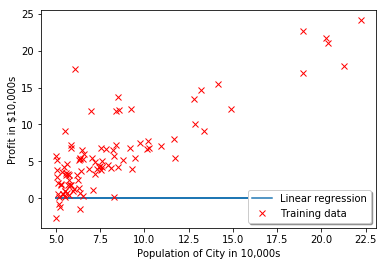

In [77]:
plt.plot(x, np.dot(X, theta), '-', label='Linear regression')
plt.plot(x, y, 'rx', label='Training data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='lower right', shadow=True, fontsize='medium')

plt.show()